In [1]:
expb_path = '/content/expb_.csv'
bycode_path = '/content/bycode.xls'

# Load data

In [2]:
import pandas as pd

df_expb = pd.read_csv(expb_path, delimiter='\t')
df_bycode = pd.read_excel(bycode_path)
df_expb.head(10)

,שם ישוב,סמל ישוב,מספר קלפי,בזב,מצביעים,פסולים,כשרים,אמת,ג,ד,...,פך,פנ,פץ,ץ,צפ,צק,ק,קנ,רק,שס
0,אבו ג'ווייעד (שבט,967,1.0,690,118,8,110,0,0,3,...,0,0,0,0,1,0,0,0,0,3
1,אבו ג'ווייעד (שבט,967,2.0,753,99,3,96,2,0,10,...,0,0,0,0,0,0,0,0,0,1
2,אבו גוש,472,1.0,725,352,13,339,23,4,116,...,0,0,1,1,7,1,1,1,0,30
3,אבו גוש,472,2.0,670,329,7,322,26,0,119,...,0,1,0,1,3,2,1,1,0,8
4,אבו גוש,472,3.0,704,345,20,325,22,1,111,...,0,0,0,1,2,0,1,2,0,5
5,אבו גוש,472,4.0,667,342,19,323,20,0,131,...,0,1,2,1,12,0,0,0,1,26
6,אבו גוש,472,5.0,588,237,11,226,13,1,75,...,0,1,0,1,2,0,0,0,0,26
7,אבו גוש,472,6.0,535,239,9,230,14,1,92,...,0,0,0,2,5,1,1,0,0,11
8,אבו סנאן,473,1.0,631,366,4,362,9,1,41,...,0,0,1,1,11,0,0,1,0,23
9,אבו סנאן,473,2.0,620,388,8,380,4,0,55,...,0,0,0,3,5,0,1,0,1,3


In [3]:
df_expb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10109 entries, 0 to 10108
Data columns (total 41 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0    שם ישוב   10109 non-null  object 
 1   סמל ישוב   10109 non-null  int64  
 2   מספר קלפי  10109 non-null  float64
 3   בזב        10109 non-null  int64  
 4   מצביעים    10109 non-null  int64  
 5   פסולים     10109 non-null  int64  
 6   כשרים      10109 non-null  int64  
 7   אמת        10109 non-null  int64  
 8   ג          10109 non-null  int64  
 9   ד          10109 non-null  int64  
 10  הי         10109 non-null  int64  
 11  הפ         10109 non-null  int64  
 12  הק         10109 non-null  int64  
 13  ו          10109 non-null  int64  
 14  ז          10109 non-null  int64  
 15  זה         10109 non-null  int64  
 16  זך         10109 non-null  int64  
 17  טב         10109 non-null  int64  
 18  יק         10109 non-null  int64  
 19  כן         10109 non-null  int64  
 20  מחל   

In [4]:
df_expb_group = df_expb.groupby(df_expb.columns[1]).sum().iloc[:, 1:]
df_expb_group.head()

<ipython-input-4-1a0611407063>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_expb_group = df_expb.groupby(df_expb.columns[1]).sum().iloc[:, 1:]


,בזב,מצביעים,פסולים,כשרים,אמת,ג,ד,הי,הפ,הק,...,פך,פנ,פץ,ץ,צפ,צק,ק,קנ,רק,שס
סמל ישוב,,,,,,,,,,,,,,,,,,,,,
7,438,314,12,302,38,2,0,0,0,0,...,0,1,0,4,34,0,0,2,0,35
10,301,199,2,197,3,4,0,0,0,0,...,0,0,0,1,2,0,0,0,0,101
11,344,237,0,237,32,0,0,0,1,0,...,0,0,0,11,23,0,0,3,0,4
13,461,349,4,345,54,2,0,0,0,0,...,0,0,0,9,57,1,0,0,1,0
15,313,214,2,212,0,1,0,0,0,0,...,0,0,0,1,3,0,0,1,0,76


# Validating data

In [5]:
column_sums = df_expb_group.sum(axis=0)
Ahuz_Hasima = 0.02 * column_sums[3] # ahuz hasima is 2%
print(column_sums[:4])
print(f"Ahuz Hasima: {Ahuz_Hasima}")
print(f"Turnout: {100*column_sums[1]/column_sums[0]:.1f}%")

בזב        5656705
מצביעים    3833646
פסולים       40904
כשרים      3792742
dtype: int64
Ahuz Hasima: 75854.84
Turnout: 67.8%


validating with wikipedia:
[link text](https://he.wikipedia.org/wiki/%D7%94%D7%91%D7%97%D7%99%D7%A8%D7%95%D7%AA_%D7%9C%D7%9B%D7%A0%D7%A1%D7%AA_%D7%94%D7%AA%D7%A9%D7%A2_%D7%A2%D7%A9%D7%A8%D7%94#noSuchAnchor:~:text=%D7%9C%D7%A0%D7%A9%D7%99%D7%90%20%D7%A9%D7%94%D7%A8%D7%9B%D7%99%D7%91%20%D7%9E%D7%9E%D7%A9%D7%9C%D7%94.-,%D7%AA%D7%95%D7%A6%D7%90%D7%95%D7%AA%20%D7%94%D7%91%D7%97%D7%99%D7%A8%D7%95%D7%AA,-%5B%D7%A2%D7%A8%D7%99%D7%9B%D7%AA%20%D7%A7%D7%95%D7%93)


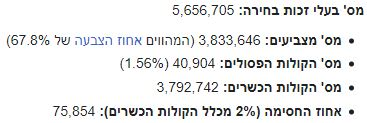

In [6]:
df_hasima = df_expb_group[column_sums[column_sums >= Ahuz_Hasima].index]
df_hasima.drop(df_hasima.columns[:3], axis=1, inplace=True)
df_hasima.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1185 entries, 7 to 9800
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   אמת     1185 non-null   int64
 1   ג       1185 non-null   int64
 2   ד       1185 non-null   int64
 3   ו       1185 non-null   int64
 4   טב      1185 non-null   int64
 5   כן      1185 non-null   int64
 6   מחל     1185 non-null   int64
 7   מרץ     1185 non-null   int64
 8   עם      1185 non-null   int64
 9   פה      1185 non-null   int64
 10  צפ      1185 non-null   int64
 11  שס      1185 non-null   int64
dtypes: int64(12)
memory usage: 120.4 KB


<ipython-input-6-af4955ab3cc2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hasima.drop(df_hasima.columns[:3], axis=1, inplace=True)


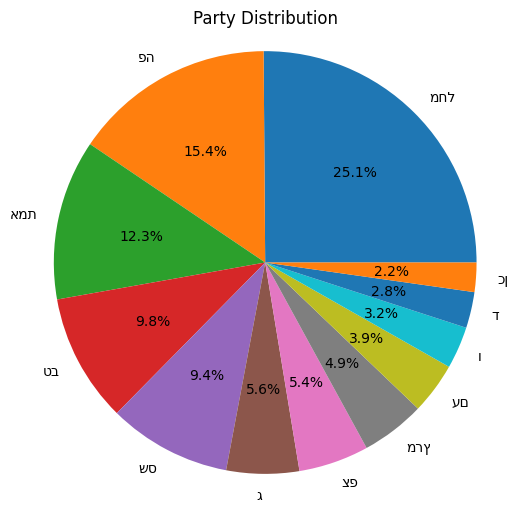

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
df_hasima.sum(axis=0).sort_values()[::-1].plot.pie(autopct='%1.1f%%',startangle=0)
plt.title('Party Distribution')
plt.axis('equal')
plt.show()

validating with wikipedia:
[link text](https://he.wikipedia.org/wiki/%D7%94%D7%91%D7%97%D7%99%D7%A8%D7%95%D7%AA_%D7%9C%D7%9B%D7%A0%D7%A1%D7%AA_%D7%94%D7%AA%D7%A9%D7%A2_%D7%A2%D7%A9%D7%A8%D7%94#noSuchAnchor:~:text=%D7%9C%D7%A0%D7%A9%D7%99%D7%90%20%D7%A9%D7%94%D7%A8%D7%9B%D7%99%D7%91%20%D7%9E%D7%9E%D7%A9%D7%9C%D7%94.-,%D7%AA%D7%95%D7%A6%D7%90%D7%95%D7%AA%20%D7%94%D7%91%D7%97%D7%99%D7%A8%D7%95%D7%AA,-%5B%D7%A2%D7%A8%D7%99%D7%9B%D7%AA%20%D7%A7%D7%95%D7%93)


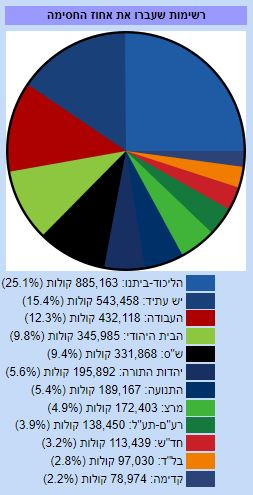

# Data insights

### Clustering

clustering by correlation

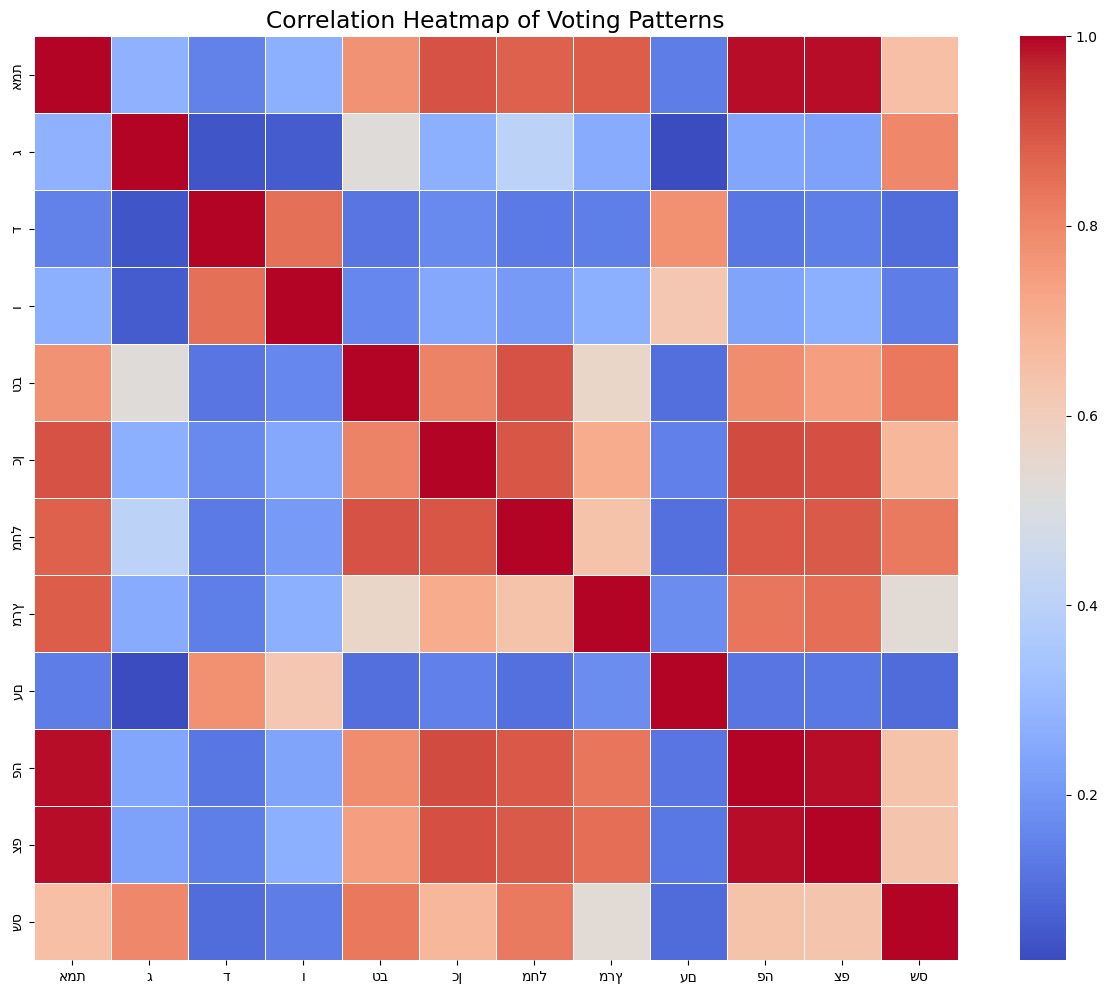

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr = df_hasima.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr, cmap="coolwarm", square=True, linewidths=.5)
sns.set(font_scale=1.4)
plt.title("Correlation Heatmap of Voting Patterns")
plt.show()

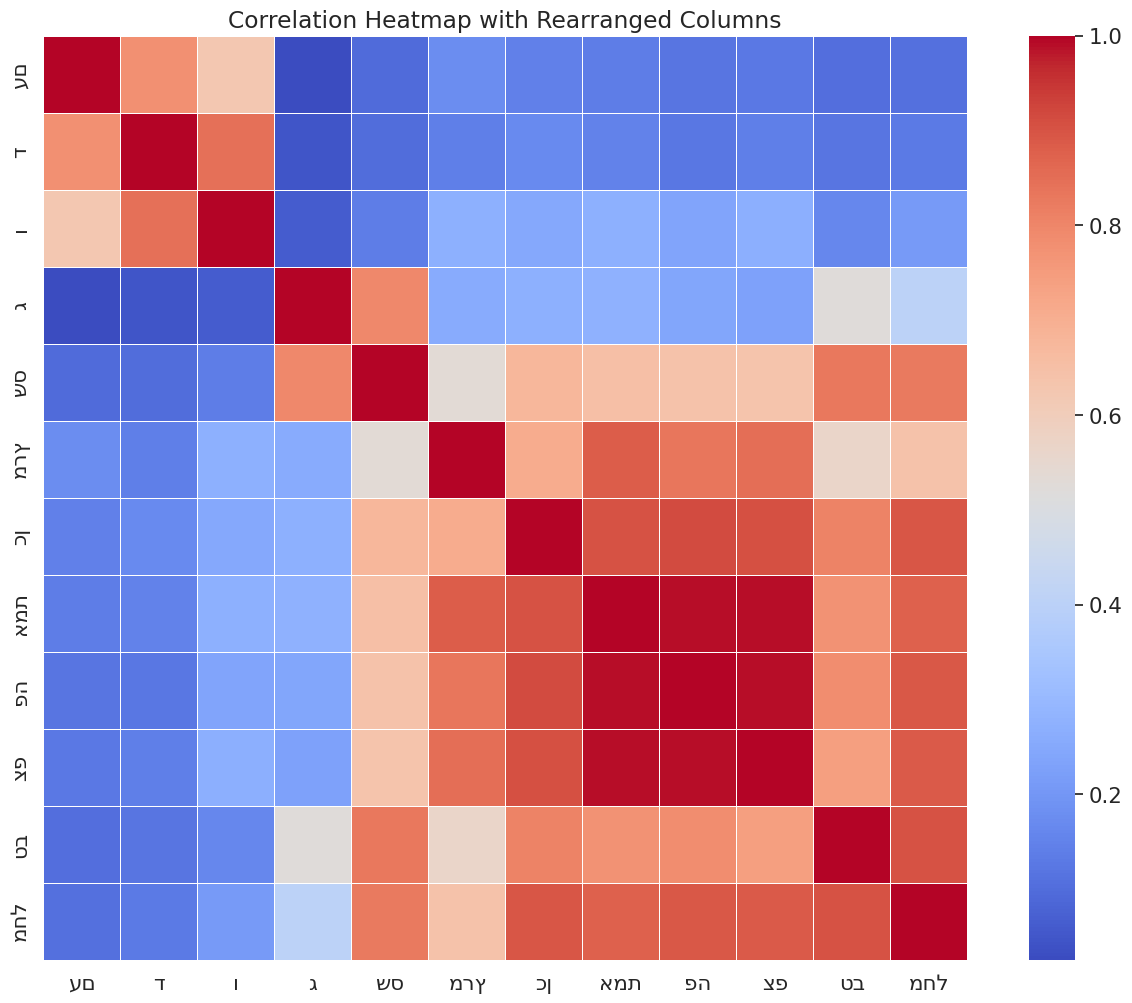

In [9]:
from scipy.cluster import hierarchy
import seaborn as sns
import matplotlib.pyplot as plt

# Remove constant columns
# constant_columns = df_hasima.columns[df_hasima.nunique() == 1].tolist()
# df_hasima_cleaned = df_hasima.drop(columns=constant_columns)
# Compute the correlation matrix for the cleaned data
# corr_cleaned = df_hasima_cleaned.corr()
df_hasima_cleaned = df_hasima
corr_cleaned = df_hasima.corr()
# Compute and determine the order of columns using hierarchical clustering for the cleaned data
links_cleaned = hierarchy.linkage(corr_cleaned, method='average')
order_cleaned = hierarchy.dendrogram(links_cleaned, no_plot=True)["leaves"]

# Rearrange the columns and correlation matrix according to hierarchical clustering
rearranged_data_cleaned = df_hasima_cleaned.iloc[:, order_cleaned]
rearranged_corr_cleaned = rearranged_data_cleaned.corr()

# Plot the heatmap with the rearranged columns for the cleaned data
plt.figure(figsize=(16, 12))
sns.heatmap(rearranged_corr_cleaned, cmap="coolwarm", square=True, linewidths=.5)
plt.title("Correlation Heatmap with Rearranged Columns")
plt.show()


clustering by K-Means

In [85]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

def plot_pca(df, cols, is_add_c=False, add_c=None):
  df_norm = df[cols] - np.mean(df[cols], axis=0)
  kmeans = KMeans(n_clusters=4)
  clusters = kmeans.fit_predict(df_norm)
  pca = PCA(n_components=2)
  df_pca = pca.fit_transform(df_norm)

  # Plot pca
  colors = ['red', 'blue', 'green', 'yellow']
  cmap = plt.get_cmap('viridis', len(np.unique(clusters)))
  scatter = plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters, cmap=cmap)
  plt.xlabel('PCA Component 1')
  plt.ylabel('PCA Component 2')
  plt.title('KMeans Clustering')
  cbar = plt.colorbar(scatter, ticks=np.arange(len(np.unique(clusters))))
  cbar.set_label('Cluster')
  plt.show()
  if is_add_c:
    scatter = plt.scatter(df_pca[:, 0], df_pca[:, 1], c=add_c, cmap='Blues')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title('KMeans Clustering')
    cbar = plt.colorbar(scatter, ticks=np.arange(len(np.unique(add_c))))
    cbar.set_label('Cluster')
    plt.show()
  # Print clusters
  centroids = kmeans.cluster_centers_
  cluster_assignments = kmeans.labels_
  cluster_centroids_df = pd.DataFrame(centroids, columns=df_norm.columns)
  for cluster_num, centroid in enumerate(cluster_centroids_df.iterrows()):
      print(f"Cluster {cluster_num} most important features:")
      top_features = centroid[1].sort_values(ascending=False).index[:3]
      print(top_features)
      print("\n")

  return df_pca

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


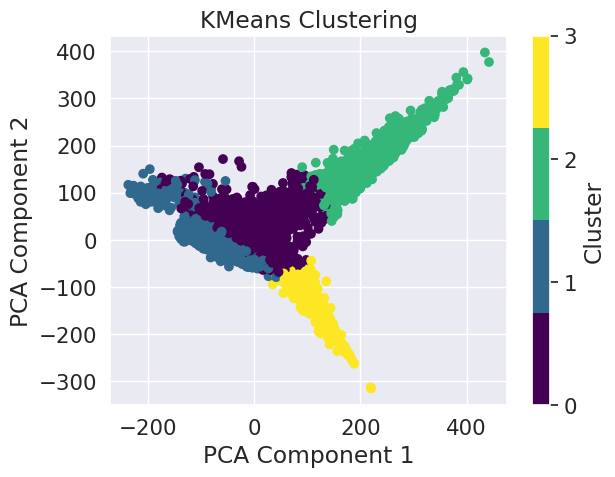

Cluster 0 most important features:
Index(['מחל', 'טב', 'שס'], dtype='object')


Cluster 1 most important features:
Index(['פה', 'אמת', 'מרץ'], dtype='object')


Cluster 2 most important features:
Index(['ג', 'שס', 'נץ'], dtype='object')


Cluster 3 most important features:
Index(['עם', 'ו', 'ד'], dtype='object')




In [16]:
cols = df_expb.columns[7:]
plot_pca(df_expb, cols)

### Anomalous detections

In [17]:
import pandas as pd
from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.05)
cols = df_expb.columns[7:]
model.fit(df_expb[cols])
df_copy = df_expb.copy()
df_copy['anomaly'] = model.predict(df_expb[cols])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [18]:
anomalous_ballot = df_copy[df_copy['anomaly'] == -1].iloc[:,:3]
anomalous_ballot

,שם ישוב,סמל ישוב,מספר קלפי
9,אבו סנאן,473,2.0
14,אבו סנאן,473,7.0
15,אבו סנאן,473,8.0
19,אבו סנאן,473,12.0
78,אום אל-פחם,2710,2.0
...,...,...,...
10034,תל אביב - יפו,5000,892.0
10042,תל אביב - יפו,5000,919.0
10046,תל אביב - יפו,5000,927.0
10077,תל שבע,1054,2.0


In [19]:
df_copy[df_copy['anomaly'] == -1]

,שם ישוב,סמל ישוב,מספר קלפי,בזב,מצביעים,פסולים,כשרים,אמת,ג,ד,...,פנ,פץ,ץ,צפ,צק,ק,קנ,רק,שס,anomaly
9,אבו סנאן,473,2.0,620,388,8,380,4,0,55,...,0,0,3,5,0,1,0,1,3,-1
14,אבו סנאן,473,7.0,624,408,11,397,10,0,5,...,0,1,1,42,0,1,2,0,49,-1
15,אבו סנאן,473,8.0,654,452,0,452,7,0,75,...,0,0,2,5,0,0,0,1,7,-1
19,אבו סנאן,473,12.0,724,423,9,414,43,0,23,...,0,2,0,39,0,2,1,1,37,-1
78,אום אל-פחם,2710,2.0,631,615,8,607,3,3,157,...,0,0,1,4,0,1,0,1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10034,תל אביב - יפו,5000,892.0,683,448,1,447,101,0,4,...,0,0,3,28,0,6,10,3,0,-1
10042,תל אביב - יפו,5000,919.0,770,368,3,365,41,0,41,...,3,1,0,17,1,5,2,1,3,-1
10046,תל אביב - יפו,5000,927.0,730,343,6,337,25,0,24,...,0,0,0,10,0,4,0,0,2,-1
10077,תל שבע,1054,2.0,634,375,14,361,7,0,31,...,0,1,0,0,1,1,1,0,29,-1


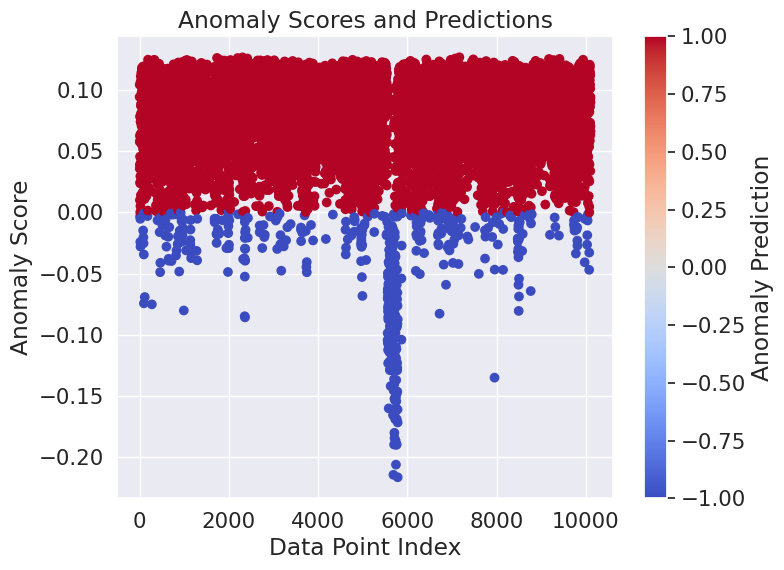

In [20]:
# Analyze anomaly scores
anomaly_scores = model.decision_function(df_copy[cols])

# Visualize anomaly scores
plt.figure(figsize=(8, 6))
plt.scatter(range(len(anomaly_scores)), anomaly_scores, c=df_copy['anomaly'], cmap='coolwarm')
plt.xlabel('Data Point Index')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores and Predictions')
plt.colorbar(label='Anomaly Prediction')
plt.show()

another way to visualize anomalous ballot boxes

In [21]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(df_expb[cols])

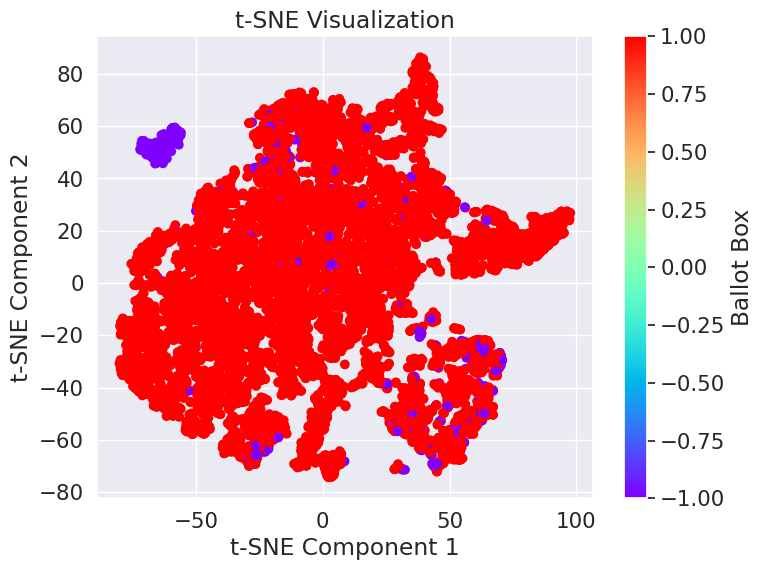

In [22]:
# Visualize the t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=df_copy['anomaly'], cmap='rainbow')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization')
plt.colorbar(label='Ballot Box')
plt.show()

In [26]:
mask = (tsne_results[:,1] < 70 ) & (tsne_results[:,1] > 40) & (tsne_results[:,0] < -50 ) & (tsne_results[:,0] > -100)
df_copy.iloc[~mask,:]

,שם ישוב,סמל ישוב,מספר קלפי,בזב,מצביעים,פסולים,כשרים,אמת,ג,ד,...,פנ,פץ,ץ,צפ,צק,ק,קנ,רק,שס,anomaly
0,אבו ג'ווייעד (שבט,967,1.0,690,118,8,110,0,0,3,...,0,0,0,1,0,0,0,0,3,1
1,אבו ג'ווייעד (שבט,967,2.0,753,99,3,96,2,0,10,...,0,0,0,0,0,0,0,0,1,1
2,אבו גוש,472,1.0,725,352,13,339,23,4,116,...,0,1,1,7,1,1,1,0,30,1
3,אבו גוש,472,2.0,670,329,7,322,26,0,119,...,1,0,1,3,2,1,1,0,8,1
4,אבו גוש,472,3.0,704,345,20,325,22,1,111,...,0,0,1,2,0,1,2,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10104,תקוע,3563,2.0,437,334,2,332,8,1,0,...,0,0,13,1,0,0,7,0,11,1
10105,תקוע,3563,3.0,445,341,3,338,4,5,0,...,0,0,7,2,0,0,3,1,7,1
10106,תראבין א-צאנע (שב,970,1.0,584,98,5,93,2,0,17,...,0,1,0,0,1,1,0,0,45,1
10107,תראבין א-צאנע(ישו,1346,1.0,154,54,1,53,0,0,4,...,2,0,0,0,0,0,0,0,32,1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


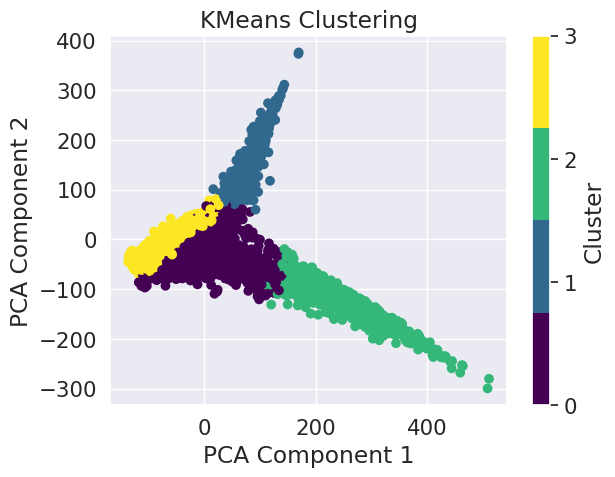

Cluster 0 most important features:
Index(['מחל', 'טב', 'שס'], dtype='object')


Cluster 1 most important features:
Index(['עם', 'ו', 'ד'], dtype='object')


Cluster 2 most important features:
Index(['ג', 'שס', 'נץ'], dtype='object')


Cluster 3 most important features:
Index(['פה', 'אמת', 'מרץ'], dtype='object')




In [27]:
plot_pca(df_copy.iloc[~mask,:], cols)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


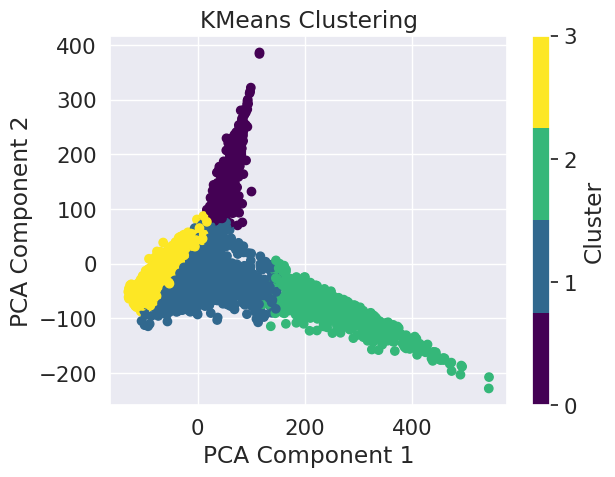

Cluster 0 most important features:
Index(['עם', 'ד', 'ו'], dtype='object')


Cluster 1 most important features:
Index(['מחל', 'טב', 'שס'], dtype='object')


Cluster 2 most important features:
Index(['ג', 'שס', 'נץ'], dtype='object')


Cluster 3 most important features:
Index(['פה', 'אמת', 'מרץ'], dtype='object')




In [29]:
df_no_anomaly = df_copy[df_copy['anomaly'] == 1]
plot_pca(df_no_anomaly, cols)

# Demographic attributes

In [93]:
df_bycode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   שם יישוב               1462 non-null   object 
 1   שם יישוב.1             1221 non-null   object 
 2   סמל                    1462 non-null   int64  
 3   תעתיק                  1257 non-null   object 
 4   מחוז                   1462 non-null   int64  
 5   נפה                    1462 non-null   int64  
 6   אזור טבעי              1331 non-null   float64
 7   מעמד מונציפאלי         1392 non-null   float64
 8   שיוך מטרופוליני        553 non-null    float64
 9   דת יישוב               1241 non-null   float64
 10  סך הכל אוכלוסייה 2013  1205 non-null   float64
 11  יהודים ואחרים          1078 non-null   float64
 12  יהודים                 1076 non-null   float64
 13  ערבים                  135 non-null    float64
 14  שנת ייסוד              1086 non-null   object 
 15  צורת

In [ ]:
df_bycode_selected = df_bycode.iloc[:, [2, 5, 9, 15]]
df_bycode_selected.info()

In [ ]:
df_grouped_no_anomaly = df_no_anomaly.groupby(
    df_no_anomaly.columns[1])[df_no_anomaly.columns[3:41]].sum().reset_index()
df_grouped_no_anomaly.info()

In [ ]:
merged_df = pd.merge(df_grouped_no_anomaly, df_bycode_selected, left_on= df_grouped_no_anomaly.columns[0], right_on=df_bycode_selected.columns[0], how='left')
merged_df.info()

In [ ]:
merged_df.dropna(inplace=True)
merged_df.info()

In [39]:
cols_pred = df_hasima.columns.append(merged_df.columns[40:])
pred_df = merged_df[cols_pred]
pred_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1178 entries, 0 to 1179
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   אמת               1178 non-null   int64  
 1   ג                 1178 non-null   int64  
 2   ד                 1178 non-null   int64  
 3   ו                 1178 non-null   int64  
 4   טב                1178 non-null   int64  
 5   כן                1178 non-null   int64  
 6   מחל               1178 non-null   int64  
 7   מרץ               1178 non-null   int64  
 8   עם                1178 non-null   int64  
 9   פה                1178 non-null   int64  
 10  צפ                1178 non-null   int64  
 11  שס                1178 non-null   int64  
 12  נפה               1178 non-null   float64
 13  דת יישוב          1178 non-null   float64
 14  צורת יישוב שוטפת  1178 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 147.2 KB


religion attributes

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


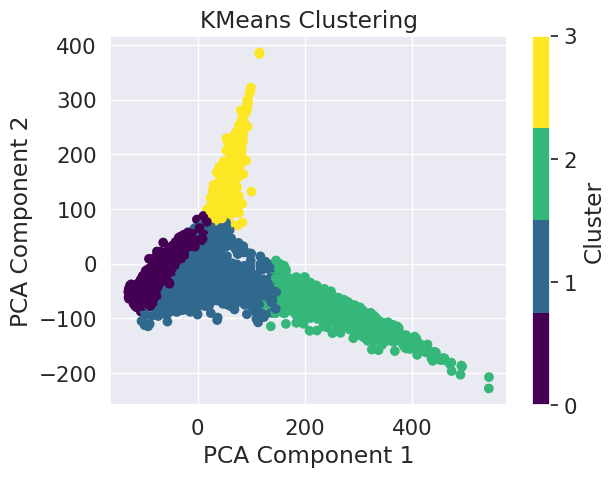

Cluster 0 most important features:
Index(['פה', 'אמת', 'מרץ'], dtype='object')


Cluster 1 most important features:
Index(['מחל', 'טב', 'שס'], dtype='object')


Cluster 2 most important features:
Index(['ג', 'שס', 'נץ'], dtype='object')


Cluster 3 most important features:
Index(['עם', 'ד', 'ו'], dtype='object')




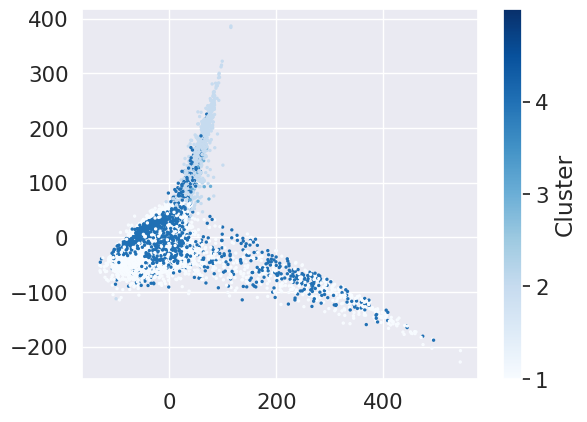

[1. 2. 3. 4. 5.]


In [107]:
merged_df_all = pd.merge(
    df_no_anomaly, df_bycode_selected, left_on=df_no_anomaly.columns[1],
    right_on=df_bycode_selected.columns[0], how='left')
merged_df_all.dropna(inplace=True)
df_pca = plot_pca(merged_df_all, cols)
add_c = merged_df_all.iloc[:,44]
scatter = plt.scatter(df_pca[:, 0], df_pca[:, 1], c=add_c, cmap='Blues', s=2)
cbar = plt.colorbar(scatter, ticks=np.arange(len(np.unique(add_c))))
cbar.set_label('Cluster')
plt.show()
print(np.unique(add_c))

# Predictor

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


df_encoded = pd.get_dummies(pred_df, columns=['דת יישוב'], prefix='דת יישוב')

# 3. Split the data into train and test sets
X_data = df_encoded.iloc[:, 12:]
y_data = df_encoded.iloc[:, :12]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
df_encoded.info()
X_train.info()
y_train.info()

In [45]:
y_train.columns

Index(['אמת', 'ג', 'ד', 'ו', 'טב', 'כן', 'מחל', 'מרץ', 'עם', 'פה', 'צפ', 'שס'], dtype='object')

In [110]:
import xgboost as xgb
from sklearn.metrics import r2_score

# Train a separate regressor for each target column
xgb_results = []

for column in y_train.columns:
    regressor = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=100, seed=42)
    regressor.fit(X_train, y_train[column])
    y_pred = regressor.predict(X_test)
    r2 = r2_score(y_test[column], y_pred)
    xgb_results.append((column, r2))

xgb_results_df = pd.DataFrame(xgb_results, columns=['Party',  'R^2 Score'])
xgb_results_df

,Party,R^2 Score
0,אמת,0.111747
1,ג,0.150275
2,ד,0.590901
3,ו,0.581536
4,טב,0.745499
5,כן,0.640701
6,מחל,0.932674
7,מרץ,-5.359368
8,עם,0.709433
9,פה,-0.061344


As can be seen from the above results, using the XGBoost algorithm makes it possible to predict the vote counts for right-wing parties based on geographic and religious attributes. However, predicting the behavior of center-left-wing parties using these attributes can be challenging. In the case of Arab parties, the model's performance is reasonable.

In [111]:
from sklearn.ensemble import RandomForestRegressor

rf_results = []

for column in y_train.columns:
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train[column])
    y_pred = rf.predict(X_test)
    r2 = r2_score(y_test[column], y_pred)
    rf_results.append((column, r2))

rf_interaction_results_df = pd.DataFrame(rf_results, columns=['Column',  'R^2 Score'])
rf_interaction_results_df

,Column,R^2 Score
0,אמת,0.714356
1,ג,0.154044
2,ד,0.638125
3,ו,0.631898
4,טב,0.694780
5,כן,0.804536
6,מחל,0.938647
7,מרץ,-0.194109
8,עם,0.752503
9,פה,0.503412


With the Random Forest algorithm, we achieved improved results for the left-wing parties

# Campaign recommendation

approach 1: stealing votes

In [ ]:
df_grouped_no_anomaly.info()

In [127]:
import matplotlib.pyplot as plt

# Filtering rows where the difference between 'מחל' and 'טב' columns is under 20% of the 'מחל' column value
filtered_df = df_grouped_no_anomaly[(df_grouped_no_anomaly['מחל'] * 0.45 >= abs(df_grouped_no_anomaly['מחל'] - df_grouped_no_anomaly['טב']))]



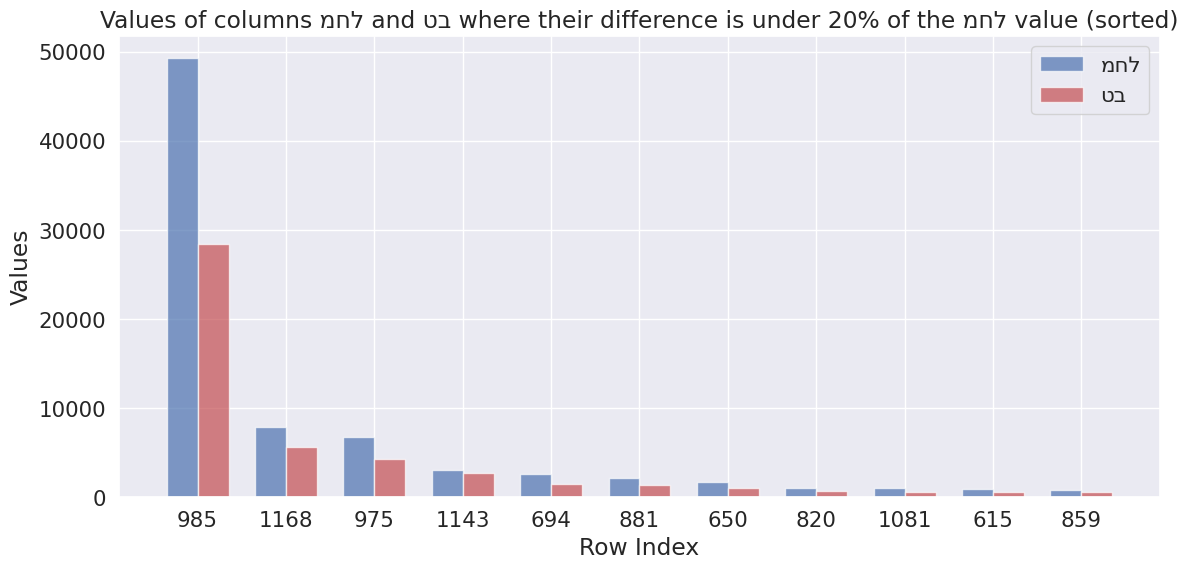

In [126]:
# Sorting the filtered dataframe based on the 'מחל' column in descending order
sorted_df = filtered_df.sort_values(by='מחל', ascending=False)
sorted_df = sorted_df.iloc[:11, :]
index = range(len(sorted_df))
# Plotting the sorted dataframe
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.35
bar1 = ax.bar(index, sorted_df['מחל'], bar_width, label='מחל', color='b', alpha=0.7)
bar2 = ax.bar([i+bar_width for i in index], sorted_df['טב'], bar_width, label='טב', color='r', alpha=0.7)

ax.set_xlabel('Row Index')
ax.set_ylabel('Values')
ax.set_title('Values of columns מחל and טב where their difference is under 20% of the מחל value (sorted)')
ax.set_xticks([i + bar_width/2 for i in index])
ax.set_xticklabels(sorted_df.index)
ax.legend()

plt.tight_layout()
plt.show()